## Set up environments

In [ ]:
#!conda install -c conda-forge pandas-datareader==0.9.0

In [1]:
# Local Working Directory
import os
	
def current_path():
	print("Current working directory before")
	print(os.getcwd())
	print()
	
# Changing the Working Dir = CH MacBook Pro (Work)
os.chdir('/Users/jonathan.cachat/Library/CloudStorage/OneDrive-CardinalHealth/JupyterNB-JC')


# Printing CWD after
current_path()

Current working directory before
/Users/jonathan.cachat/Library/CloudStorage/OneDrive-CardinalHealth/JupyterNB-JC



In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') # background
get_ipython().magic(u'matplotlib inline')
 # see list in notebook

/var/folders/th/lsfvyc_94kl0wf7dy1rvmndw0000gp/T/ipykernel_4118/106938365.py:8: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic(u'matplotlib inline')


In [3]:
# Reading stock data from the Internet using pandas
from pandas_datareader import data

In [4]:
# float numbers
from __future__ import division

## Import Stock Ticker data from Yahoo

In [5]:
# select tech stocks
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
# start and end date for data grab
end = datetime.now()
end = datetime.now()
start = datetime(end.year-4,end.month,end.day)

In [7]:
print(start)
print(end)

2018-08-18 00:00:00
2022-08-18 03:43:10.492668


In [8]:
# loop for grabing finance data
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)
    # taking string of stock ticker into global variable,and create a data frame

# BTC daily from 2014 - 2022

In [19]:
data = pd.read_csv('/Users/jonathan.cachat/Library/CloudStorage/OneDrive-CardinalHealth/JupyterNB-JC/data/btc.csv')

# Inspect data
print(data.info())
print(data.head())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB
None
         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

  

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


## 1. Single Stock Analysis

### Whole year of stock adjusted closing prize

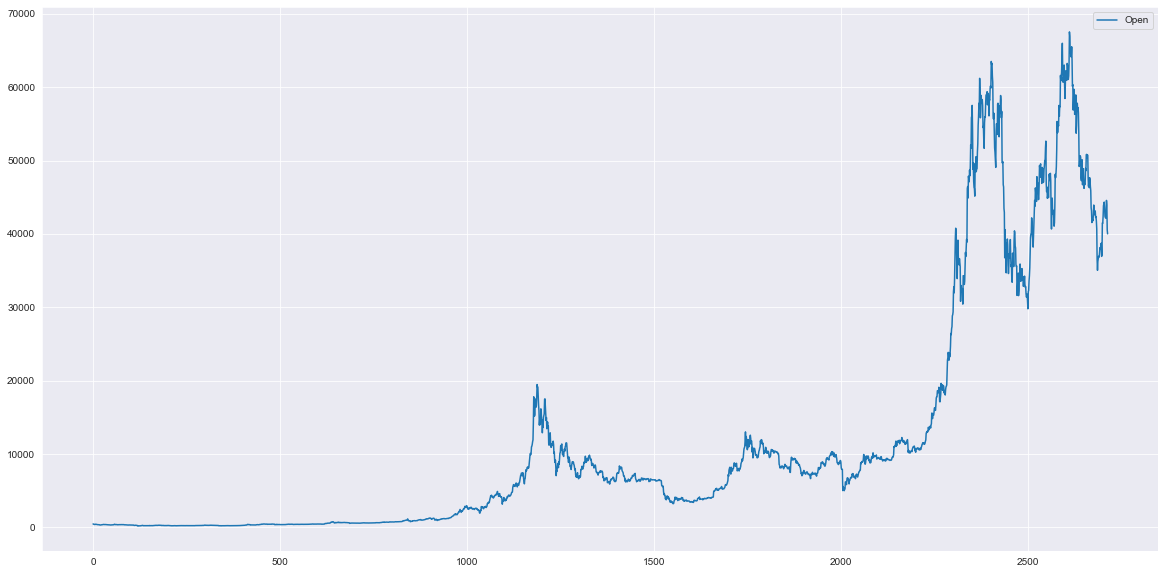

In [21]:
data['Open'].plot(legend=True,figsize=(20,10))


plt.show()

### Total volunm of the stock been traded each day

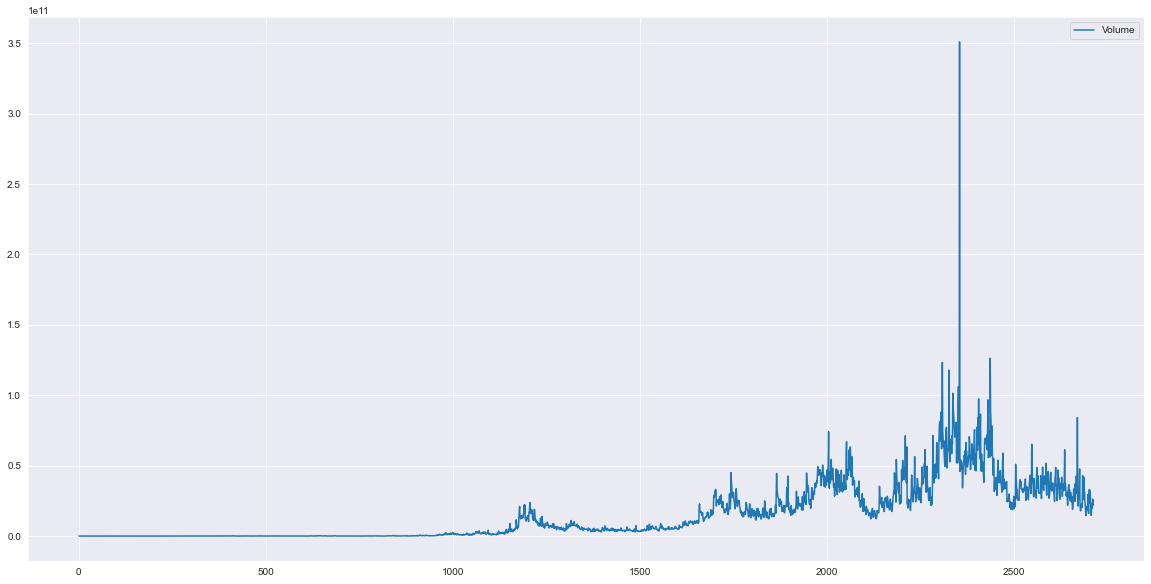

In [23]:
data['Volume'].plot(legend=True,figsize=(20,10))
plt.show()

### Moving Average of te stock

In [24]:
# Calculate the moving average of the stock
ma_day = [30,60,180]

for ma in ma_day:
    column_name = "MA for %s days"%(str(ma))

    data[column_name] = data['Open'].rolling(window=ma).mean()

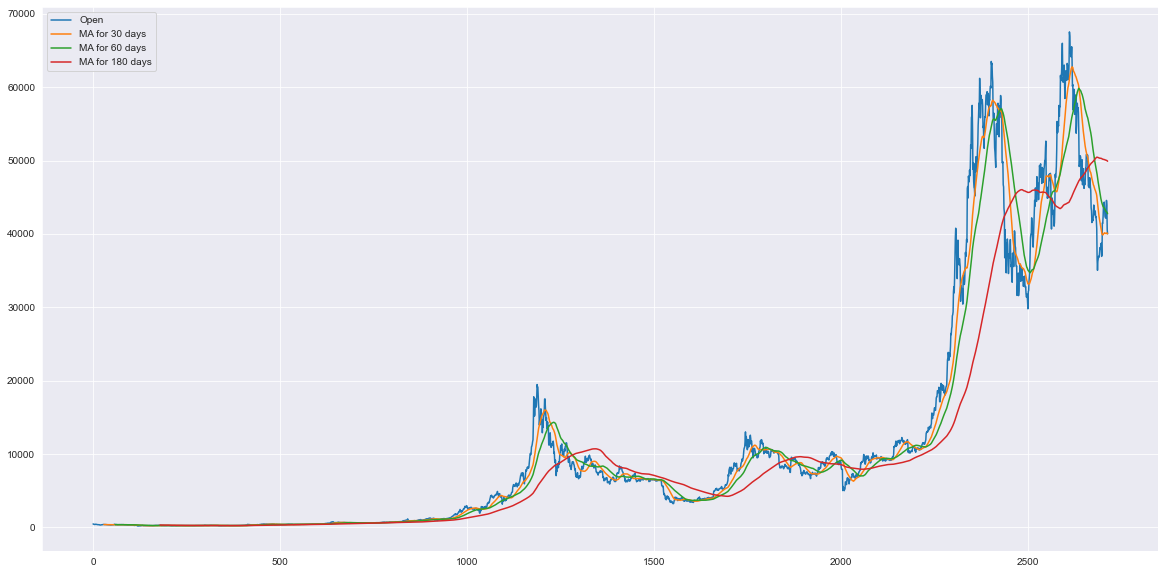

In [25]:
data[['Open','MA for 30 days','MA for 60 days','MA for 180 days']].plot(subplots=False,figsize=(20,10))
plt.show()

### Daily Returns of the stock

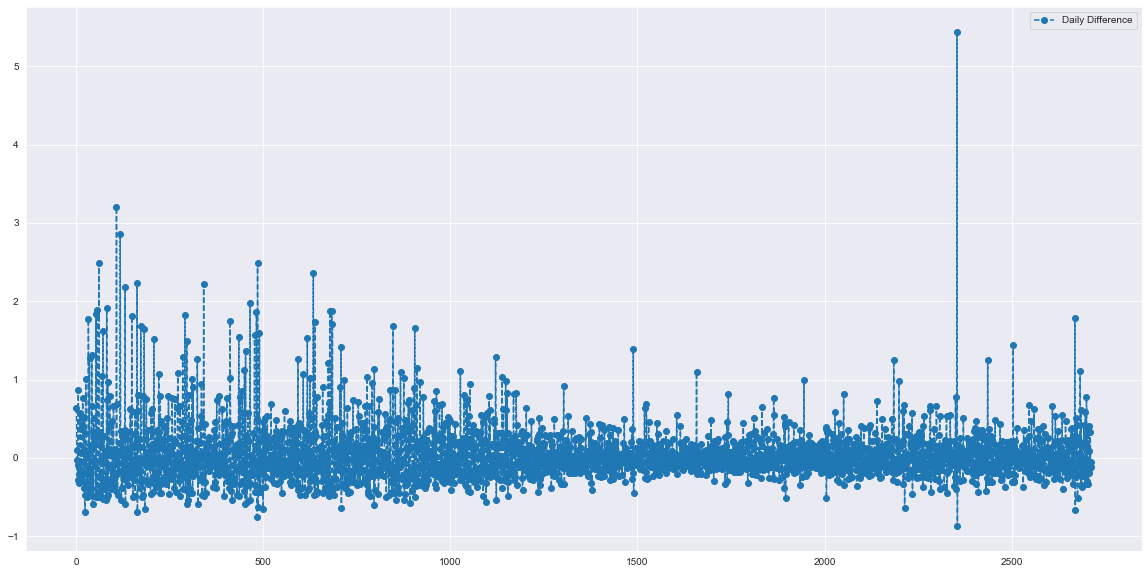

In [26]:
# Analyse daily returns of the Stock
data['Daily Difference'] = data['Volume'].pct_change()
    # on any given day, what was the percent return of invest
data['Daily Difference'].plot(figsize=(20,10),legend=True,linestyle='--',marker='o')
plt.show()

### Boxplot

In [ ]:
# Preprocess DataFrame
stats_df = data.drop(['Close', 'Low', 'Open'], ['High'], axis=1)
 
# New boxplot using stats_df
#plt.figure(figsize=(20,10) # Set plot dimensions
plt.boxplot(data=stats_df)

### Average daily return of the last year

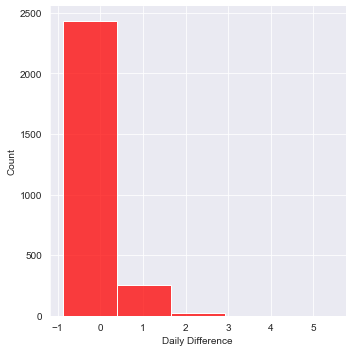

In [30]:
# Calling histogram of daily return by seaburn
sns.displot(data['Daily Difference'].dropna(),bins=5,color ='red' )
plt.show()

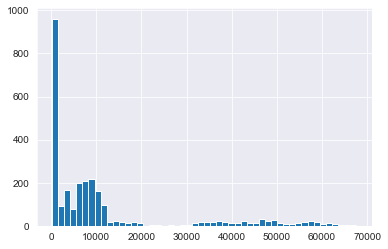

In [31]:
#Calling histogram of daily return
data['Open'].hist(bins=50)
plt.show()

## 2. Stock list analysis

In [ ]:
# Create new dataframe from imported data 
#closing_df = data.DataReader(tech_list,'yahoo',start,end)['Adj Close']
# Use datareader, passed tech list using yahoo,specified the wanted column

btc = pd.read_csv('/Users/jonathan.cachat/Library/CloudStorage/OneDrive-CardinalHealth/JupyterNB-JC/data/btc.csv')

# Inspect data
print(btc.info())

# Convert the date column to datetime64
btc['Date'] = pd.to_datetime(btc['Date'])

btc.set_index('Date', inplace=True)

# Inspect data
print(btc.info())

In [ ]:
# Map the dataframe
btc.head()

### Daily Return of stock lists

In [ ]:
# Create a new data frame
tech_rets = btc.pct_change()

In [ ]:
tech_rets.head()

### Compare the daily return of two stocks

In [32]:
#Using seaborn to map out corrolation scatter plots
sns.jointplot('GOOG','AAPL',tech_rets,kind = 'scatter',color='purple')
plt.show()

NameError: name 'tech_rets' is not defined

### Compare daily return of multiple stocks

In [ ]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

In [ ]:
# Call seaborn to map out histogram and corrolation scatter plots
sns.pairplot(tech_rets.dropna())
plt.show()

### Compare different stocks' daily returns

In [33]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter,color='blue')

return_fig.map_lower(sns.kdeplot,cmap='cool_d')

return_fig.map_diag(plt.hist,bins=30,color='grey')

plt.show()

NameError: name 'tech_rets' is not defined

## Risk Analysis

### Analyse risk of a stock

In [ ]:
# Compare standard deviation of daily return with expected return

rets = tech_rets.dropna()


In [ ]:
# Set the area of these circles of the scatter plot
area = np.pi*20
plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel("Risk")

for label, x, y, in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

### Value at Risk

In [ ]:
sns.distplot(GOOG['Daily Return'].dropna(),bins=100,color='purple')
plt.show()

In [ ]:
stock['GOOG']

In [ ]:
#Quuantile Method
rets['GOOG'].quantile(0.05)

In [ ]:
# Monte Carlo Method
days = 365
dt =1/days
mu =rets.mean()['GOOG']
sigma = rets.std()['GOOG']
# Using GMB(markov Process),stock follows random walk

In [ ]:
def stock_monte_carlo(start_price,days,mu,sigma):

    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1,days):

        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))

    return price

In [36]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-08-20,60.549999,59.731300,60.250999,60.388500,17416000.0,60.388500
2018-08-21,60.862999,60.017700,60.400002,60.081001,24112000.0,60.081001
2018-08-22,60.591999,59.950001,60.000000,60.366501,17748000.0,60.366501
2018-08-23,61.063999,60.212002,60.356998,60.269001,19852000.0,60.269001
2018-08-24,61.082500,60.317951,60.441002,61.032501,18932000.0,61.032501


In [43]:
start_price = 1397.93994140625

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')
plt.show()

NameError: name 'stock_monte_carlo' is not defined

In [ ]:
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

In [ ]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

#starting price
plt.figtext(0.6, 0.8, s="Start Price: $%.2f"%start_price)
#Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f"%simulations.mean())

#Variance o fthe price 99% confidence
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f"%q)

#Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

#Title
plt.title(u"Final price distribution for Google Stocks after $% days"%days,weight='bold');

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=02fd096c-a891-4d76-a850-438bcce243d0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>